# 1. Cálculo de risco de ações

Neste trabalho, compararemos, utilizando cálculos de risco, variância, covariância e volatilidade, se é mais seguro investir nas ações da BOVA ou nas ações das outras empresas da carteira.

# 2. Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set()

In [2]:
dataset = pd.read_csv(r"C:\Users\hernandes\acoes.csv")

In [3]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.000000,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.670000,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.150000,11.811500,0.240000,32.987301,48.509998
5,2015-01-09,14.050000,14.000000,11.757700,0.231875,32.647999,47.529999
6,2015-01-12,14.250000,13.450000,11.692300,0.234375,34.634201,46.830002
7,2015-01-13,13.690000,13.890000,11.734600,0.231875,33.436501,46.639999
8,2015-01-14,13.780000,13.770000,11.923100,0.228125,33.186901,46.480000
9,2015-01-15,14.050000,14.000000,11.923100,0.227500,32.538200,47.000000


In [4]:
dataset.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,14.571473,32.860445,20.920034,4.634487,34.619463,71.770643
std,10.244303,16.118635,14.155955,6.023464,11.576407,19.913738
min,1.160000,6.490000,9.884610,0.030585,17.260000,36.450001
25%,6.635000,18.140224,12.640425,0.192734,28.196400,53.742500
50%,11.755000,29.105000,16.808849,2.315625,30.961201,71.090000
75%,20.355000,48.485000,19.480000,5.811485,36.226201,90.647503
max,43.790001,64.800003,83.550003,26.219999,83.720001,115.209999


# 3. Cálculo dos retornos anuais

Usaremos as ações da CVC e MGLU.

### 2015

In [5]:
# CVC

dataset['CVC'][dataset['Date'] == '2015-01-02'], dataset['CVC'][dataset['Date'] == '2015-12-30']

(0    15.2
 Name: CVC, dtype: float64, 245    13.5
 Name: CVC, dtype: float64)

In [6]:
np.log(13.5 / 15.2)*100

-11.86057424078469

In [7]:
# MGLU

dataset['MGLU'][dataset['Date'] == '2015-01-02'], dataset['MGLU'][dataset['Date'] == '2015-12-30']

(0    0.232812
 Name: MGLU, dtype: float64, 245    0.068945
 Name: MGLU, dtype: float64)

In [8]:
np.log(0.06 / 0.23)*100

-134.37347467010946

### 2016

In [9]:
# CVC

dataset['CVC'][dataset['Date'] == '2016-01-04'], dataset['CVC'][dataset['Date'] == '2016-12-29']

(246    12.53
 Name: CVC, dtype: float64, 494    23.700001
 Name: CVC, dtype: float64)

In [10]:
np.log(23.70 / 12.53)*100

63.73492792331087

In [11]:
# MGLU

dataset['MGLU'][dataset['Date'] == '2016-01-04'], dataset['MGLU'][dataset['Date'] == '2016-12-29']

(246    0.070117
 Name: MGLU, dtype: float64, 494    0.414726
 Name: MGLU, dtype: float64)

In [12]:
np.log(0.41 / 0.07)*100

176.76619176489942

### 2017

In [13]:
# CVC

dataset['CVC'][dataset['Date'] == '2017-01-02'], dataset['CVC'][dataset['Date'] == '2017-12-29']

(495    23.02
 Name: CVC, dtype: float64, 748    48.5
 Name: CVC, dtype: float64)

In [14]:
np.log(48.5 / 23.02)*100

74.5200394649701

In [15]:
# MGLU

dataset['MGLU'][dataset['Date'] == '2017-01-02'], dataset['MGLU'][dataset['Date'] == '2017-12-29']

(495    0.397304
 Name: MGLU, dtype: float64, 748    2.50688
 Name: MGLU, dtype: float64)

In [16]:
np.log(2.5 / 0.40)*100

183.25814637483103

### 2018

In [17]:
# CVC

dataset['CVC'][dataset['Date'] == '2018-01-02'], dataset['CVC'][dataset['Date'] == '2018-12-28']

(749    49.880001
 Name: CVC, dtype: float64, 993    61.18
 Name: CVC, dtype: float64)

In [18]:
np.log(61.18 / 49.89)*100

20.399975684981133

In [19]:
# MGLU

dataset['MGLU'][dataset['Date'] == '2018-01-02'], dataset['MGLU'][dataset['Date'] == '2018-12-28']

(749    2.47813
 Name: MGLU, dtype: float64, 993    5.65844
 Name: MGLU, dtype: float64)

In [20]:
np.log(5.65 / 2.48)*100

82.33969849814588

### 2019

In [21]:
# CVC

dataset['CVC'][dataset['Date'] == '2019-01-02'], dataset['CVC'][dataset['Date'] == '2019-12-30']

(994    61.099998
 Name: CVC, dtype: float64, 1240    43.799999
 Name: CVC, dtype: float64)

In [22]:
np.log(43.79 / 61.09)*100

-33.29427058483686

In [23]:
# MGLU

dataset['MGLU'][dataset['Date'] == '2019-01-02'], dataset['MGLU'][dataset['Date'] == '2019-12-30']

(994    5.81219
 Name: MGLU, dtype: float64, 1240    11.925
 Name: MGLU, dtype: float64)

In [24]:
np.log(11.925 / 5.81)*100

71.90564659105851

### 2020

In [25]:
# CVC

dataset['CVC'][dataset['Date'] == '2020-01-02'], dataset['CVC'][dataset['Date'] == '2020-11-03']

(1241    44.709999
 Name: CVC, dtype: float64, 1445    12.42
 Name: CVC, dtype: float64)

In [26]:
np.log(12.42 / 44.71)*100

-128.08891137405567

In [27]:
# MGLU

dataset['MGLU'][dataset['Date'] == '2020-01-02'], dataset['MGLU'][dataset['Date'] == '2020-11-03']

(1241    12.3325
 Name: MGLU, dtype: float64, 1445    25.309999
 Name: MGLU, dtype: float64)

In [28]:
np.log(25.31 / 12.33)*100

71.91642573807796

# 4. Variância

#### CVC

In [29]:
taxas_cvc = np.array([-11.86, 63.73, 74.52, 20.42, -33.29, -128.06])

In [30]:
media_cvc = taxas_cvc.mean()
media_cvc

-2.423333333333332

In [31]:
variancia_cvc = taxas_cvc.var()
variancia_cvc

4607.455288888889

#### MGLU

In [32]:
taxas_mglu = np.array([-132.37, 176.76, 185.78, 82.74, 71.86, 71.87])

In [33]:
media_mglu = taxas_mglu.mean()
media_mglu

76.10666666666667

In [34]:
variancia_mglu = taxas_mglu.var()
variancia_mglu

10950.306455555556

# 5. Desvio padrão

In [35]:
desvio_padrao_cvc = math.sqrt(variancia_cvc)
desvio_padrao_cvc

67.87823869907712

In [36]:
desvio_padrao_mglu = math.sqrt(variancia_mglu)
desvio_padrao_mglu

104.64371197332191

In [37]:
# desvio padrão das duas ações nos últimos 330 dias

dataset['CVC'].tail(330).std(), dataset['MGLU'].tail(330).std()

(16.124071381159258, 5.3094503306873)

# 6. Coeficiente de variação

In [38]:
coeficiente_variacao_cvc = (desvio_padrao_cvc/media_cvc)*100
coeficiente_variacao_cvc

-2801.0277317363334

In [39]:
# usando o scipy

stats.variation(taxas_cvc)*100

-2801.0277317363334

In [40]:
# usando o scipy

stats.variation(taxas_mglu)*100

137.49611769444888

# 7. Risco médio anual

In [41]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.200000,11.846200,0.232812,35.732101,47.259998
1,14.850000,15.000000,11.926900,0.237187,34.634201,46.320000
2,15.210000,14.800000,11.750000,0.234062,32.468300,46.580002
3,14.550000,14.670000,11.615400,0.241875,32.238701,48.150002
4,14.270000,14.150000,11.811500,0.240000,32.987301,48.509998
5,14.050000,14.000000,11.757700,0.231875,32.647999,47.529999
6,14.250000,13.450000,11.692300,0.234375,34.634201,46.830002
7,13.690000,13.890000,11.734600,0.231875,33.436501,46.639999
8,13.780000,13.770000,11.923100,0.228125,33.186901,46.480000
9,14.050000,14.000000,11.923100,0.227500,32.538200,47.000000


In [42]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
5,-0.015417,-0.010601,-0.004555,-0.033854,-0.010286,-0.020202
6,0.014235,-0.039286,-0.005562,0.010782,0.060837,-0.014727
7,-0.039298,0.032714,0.003618,-0.010667,-0.034581,-0.004057
8,0.006574,-0.008639,0.016064,-0.016172,-0.007465,-0.003431
9,0.019594,0.016703,0.000000,-0.002740,-0.019547,0.011188


In [44]:
taxas_retorno.std() *100

GOL     5.159740
CVC     3.468112
WEGE    2.217699
MGLU    4.222228
TOTS    2.997335
BOVA    1.730331
dtype: float64

As ações da BOVA apresentam menos riscos, pois apresentam menor variação.

In [48]:
# variação média anual

taxas_retorno.std() * math.sqrt(246) # conceito anualizar

GOL     0.809274
CVC     0.543952
WEGE    0.347833
MGLU    0.662231
TOTS    0.470114
BOVA    0.271392
dtype: float64

# 8. Correlação entre ações

In [49]:
taxas_retorno.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002662,0.000895,0.000366,0.000710,0.000401,0.000528
CVC,0.000895,0.001203,0.000241,0.000479,0.000274,0.000336
WEGE,0.000366,0.000241,0.000492,0.000276,0.000199,0.000207
MGLU,0.000710,0.000479,0.000276,0.001783,0.000252,0.000335
TOTS,0.000401,0.000274,0.000199,0.000252,0.000898,0.000211
BOVA,0.000528,0.000336,0.000207,0.000335,0.000211,0.000299


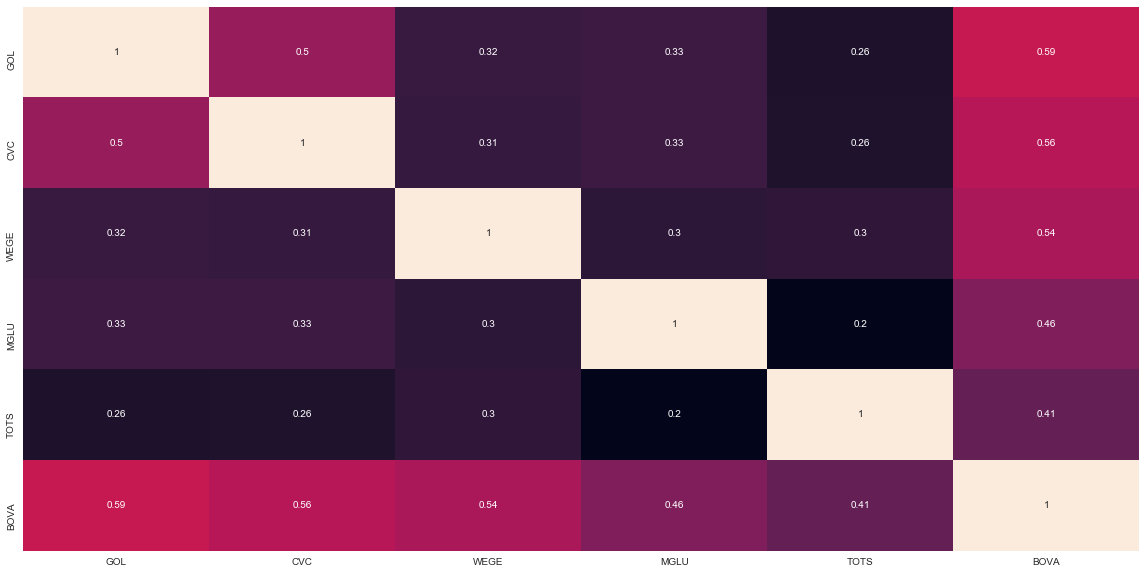

In [55]:
grafico = taxas_retorno.corr()
plt.figure(figsize=(20,10))
sns.heatmap(grafico, annot=True, cbar=False)

# 9. Risco de portfólio

### Somente duas ações - Gol e CVC

In [58]:
taxas_retorno_gol_cvc = taxas_retorno.drop(columns = ['WEGE', 'MGLU', 'TOTS', 'BOVA'])
taxas_retorno_gol_cvc

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447
5,-0.015417,-0.010601
6,0.014235,-0.039286
7,-0.039298,0.032714
8,0.006574,-0.008639
9,0.019594,0.016703


In [67]:
# matriz de covariância

taxas_retorno_gol_cvc.cov() * 246

,GOL,CVC
GOL,0.654924,0.220052
CVC,0.220052,0.295884


In [68]:
pesos = np.array([0.5, 0.5])

In [69]:
np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos)

array([0.43748787, 0.25796791])

In [70]:
np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))

0.3477278915072453

In [72]:
math.sqrt(np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))) * 100

58.96845695007165

### Todas as ações

In [73]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [74]:
pesos1.sum()

1.0

In [76]:
taxas_retorno.cov() 

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002662,0.000895,0.000366,0.000710,0.000401,0.000528
CVC,0.000895,0.001203,0.000241,0.000479,0.000274,0.000336
WEGE,0.000366,0.000241,0.000492,0.000276,0.000199,0.000207
MGLU,0.000710,0.000479,0.000276,0.001783,0.000252,0.000335
TOTS,0.000401,0.000274,0.000199,0.000252,0.000898,0.000211
BOVA,0.000528,0.000336,0.000207,0.000335,0.000211,0.000299


In [77]:
taxas_retorno.cov() * 246

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.654924,0.220052,0.090071,0.174658,0.098555,0.129777
CVC,0.220052,0.295884,0.059308,0.117807,0.067282,0.082774
WEGE,0.090071,0.059308,0.120987,0.068012,0.048997,0.050935
MGLU,0.174658,0.117807,0.068012,0.438549,0.062077,0.082358
TOTS,0.098555,0.067282,0.048997,0.062077,0.221007,0.051952
BOVA,0.129777,0.082774,0.050935,0.082358,0.051952,0.073654


In [79]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.24765205, 0.15206665, 0.0774753 , 0.17222065, 0.09958374,
       0.07955904])

In [81]:
variancia_portfolio1 = np.dot(pesos1,np.dot(taxas_retorno.cov() * 246, pesos1) )
variancia_portfolio1

0.1497996784376145

In [83]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.3870396341947611

In [84]:
volatilidade_portfolio1 * 100

38.70396341947611

### Volatilidade BOVA

In [85]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [87]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov()*246, pesos2))
variancia_portfolio2

0.073653547522288

In [88]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2

0.2713918707741409

In [89]:
volatilidade_portfolio2 * 100

27.13918707741409

# 10. Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente. Não pode ser eliminado e pode afetar todas as empresas.
- Risco não sistemático: eventos específicos na empresa.

In [90]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
5,-0.015417,-0.010601,-0.004555,-0.033854,-0.010286,-0.020202
6,0.014235,-0.039286,-0.005562,0.010782,0.060837,-0.014727
7,-0.039298,0.032714,0.003618,-0.010667,-0.034581,-0.004057
8,0.006574,-0.008639,0.016064,-0.016172,-0.007465,-0.003431
9,0.019594,0.016703,0.000000,-0.002740,-0.019547,0.011188


In [91]:
pesos1

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. ])

In [92]:
pesos2

array([0., 0., 0., 0., 0., 1.])

In [94]:
 taxas_retorno.var() * 246 # variância anual

GOL     0.654924
CVC     0.295884
WEGE    0.120987
MGLU    0.438549
TOTS    0.221007
BOVA    0.073654
dtype: float64

In [96]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

GOL     0.130985
CVC     0.059177
WEGE    0.024197
MGLU    0.087710
TOTS    0.044201
BOVA    0.000000
dtype: float64

In [98]:
# risco não sistemático

sub1 = variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5]
sub1

-0.08430073336717872

In [99]:
variancia_portfolio1

0.1497996784376145

In [100]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.2341004118047932

In [101]:
# risco não sistemático BOVA

variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

GOL     0.000000
CVC     0.000000
WEGE    0.000000
MGLU    0.000000
TOTS    0.000000
BOVA    0.073654
dtype: float64

In [102]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

-0.073653547522288

In [103]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

0.147307095044576

# Conclusão

Os resultados mostraram uma maior segurança em investir nas ações da BOVA do que nas ações das outras empresas da carteira.